In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

In [4]:
newsgroups = fetch_20newsgroups(subset='all')

In [5]:
texts = newsgroups.data
labels = newsgroups.target

Let's preprocess the data

In [6]:
# Tokenize the text
tokenizer = Tokenizer(num_words=10000) 
tokenizer.fit_on_texts(texts) 
sequences = tokenizer.texts_to_sequences(texts) 

# Pad the sequence: to ensure that each text has the equal amount of characters
max_length = 100
data = pad_sequences(sequences, maxlen=max_length)

# encode the labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=.2, random_state=42)



In [18]:
import pandas as pd
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,16,17,291,6,1,203,658,509,7,855,...,4,139,3339,9,8,14,1,3,8007,242
1,0,0,0,0,0,0,0,0,0,0,...,182,1034,854,138,1384,62,14,40,7,157
2,0,0,0,0,0,0,0,0,0,0,...,4,3009,242,5,1849,34,710,1231,37,2394
3,33,621,504,3,359,2736,88,77,84,5189,...,1486,7159,23,1,46,2,200,515,22,897
4,47,17,2388,828,715,20,150,6780,4626,1,...,2388,1084,2388,631,2388,828,4883,3,4883,791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15071,0,0,0,0,0,0,0,0,0,0,...,9921,782,7,42,276,38,149,2983,2,18
15072,0,0,0,0,0,0,0,0,14,1997,...,22,4,349,8,9,849,2,18,555,1135
15073,46,3,112,2088,11,1107,2,1228,603,28,...,2005,763,7,221,7170,61,5127,16,1,344
15074,0,0,0,0,0,0,0,0,0,0,...,43,18,46,3,1,365,313,715,209,285


In [20]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=16, input_length=max_length), 
    GlobalAveragePooling1D(), 
    Dense(32, activation='relu'),
    Dense(20, activation='softmax') 

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

In [23]:
# let's train our data
history = model.fit(X_train, Y_train, epochs=20, batch_size=128, validation_split=0.2) 

Epoch 1/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.0762 - loss: 2.9885 - val_accuracy: 0.1631 - val_loss: 2.9443
Epoch 2/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1697 - loss: 2.9169 - val_accuracy: 0.2079 - val_loss: 2.7860
Epoch 3/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2397 - loss: 2.6929 - val_accuracy: 0.2987 - val_loss: 2.4549
Epoch 4/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3584 - loss: 2.3373 - val_accuracy: 0.3750 - val_loss: 2.1594
Epoch 5/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4347 - loss: 2.0409 - val_accuracy: 0.4542 - val_loss: 1.9398
Epoch 6/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5224 - loss: 1.7875 - val_accuracy: 0.5046 - val_loss: 1.7596
Epoch 7/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5937 - loss: 1.5885 - val_accuracy: 0.5653 - val_loss: 1.6067
Epoch 8/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6583 - loss: 1.3938 - val_accuracy: 0.6044 - val_loss

In [24]:
test_loss, text_accuracy = model.evaluate(X_test, Y_test)
print(f'Test accuracy: {text_accuracy}')

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7167 - loss: 0.9413
Test accuracy: 0.7289124727249146


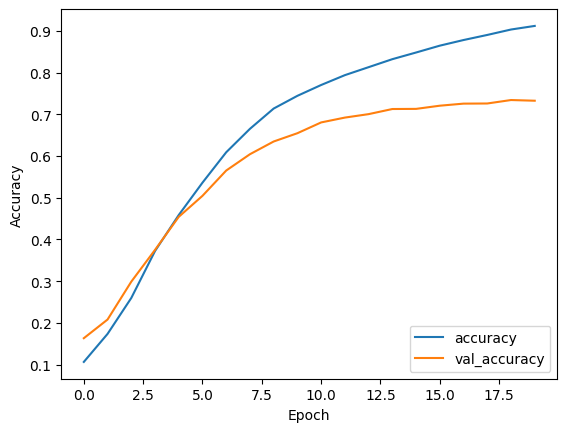

In [25]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [30]:
# make predictions on the test text from index 40 to 44
predictions = model.predict(X_test[40:45])
predicted_labels = [label_encoder.inverse_transform([tf.argmax(prediction).numpy()]) for prediction in predictions] 

class_names = newsgroups.target_names 

# convert the predicted labels to class names using class_names
predicted_labels_names = [class_names[label[0]] for label in predicted_labels]

# get actual labels (numeric) for the corresponding test data
actual_labels = Y_test[40:45]

# convert the actual labels to class names using class_names
actual_labels_names = [class_names[label] for label in actual_labels]

for i in range(5):
  print(f'Text {i+1}: {newsgroups.data[i]}')
  print(f'Actual label: {actual_labels_names[i]}')
  print(f'Predicted label: {predicted_labels_names[i]}')
  print('-----------------------------------------------------------------------')
  print('-----------------------------------------------------------------------')
  print('-----------------------------------------------------------------------')
  print('-----------------------------------------------------------------------')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Text 1: From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!


Actual label: rec.sport.baseball
Predicted label: r

20